# Week 8-7 시계열 인공신경망

In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week8')

In [3]:
#Read the dataset into a pandas.DataFrame
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [4]:
#Let's see the first five rows of the DataFrame
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

In [5]:
today=datetime.datetime(year=2024,month=9,day=4)

In [6]:
today

datetime.datetime(2024, 9, 4, 0, 0)

In [7]:
type(today)

datetime.datetime

In [8]:
datetime.datetime.today()

datetime.datetime(2024, 9, 4, 16, 46, 11, 353072)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [10]:
# Index creation
df['datetime'] = df[['year', 'month', 'day', 'hour']].\
    apply(lambda row: datetime.datetime(year=row['year'], \
    month=row['month'], day=row['day'],hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  \
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0   
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0   
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0   
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0   
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0   

             datetime  
0 2010-01-01 00:00:00  
1 2010-01-01 01:00:00  
2 2010-01-01 02:00:00  
3 2010-01-01 03:00:00  
4 2010-01-01 04:00:00

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43824 entries, 0 to 43823
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        43824 non-null  int64         
 1   year      43824 non-null  int64         
 2   month     43824 non-null  int64         
 3   day       43824 non-null  int64         
 4   hour      43824 non-null  int64         
 5   pm2.5     41757 non-null  float64       
 6   DEWP      43824 non-null  int64         
 7   TEMP      43824 non-null  float64       
 8   PRES      43824 non-null  float64       
 9   cbwd      43824 non-null  object        
 10  Iws       43824 non-null  float64       
 11  Is        43824 non-null  int64         
 12  Ir        43824 non-null  int64         
 13  datetime  43824 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(8), object(1)
memory usage: 5.0+ MB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of Air Pressure')

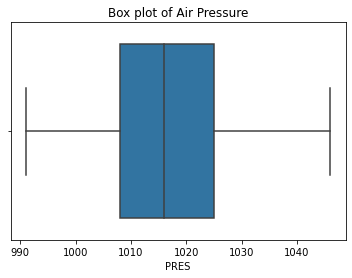

In [12]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
g = sns.boxplot(df['PRES'])
g.set_title('Box plot of Air Pressure')


Text(0, 0.5, 'Air Pressure readings in hPa')

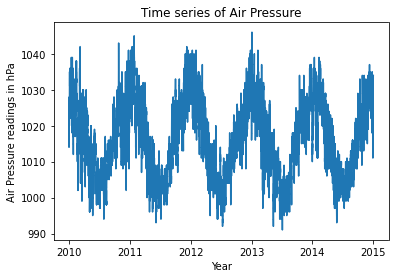

In [13]:
# Time series visualization
g = sns.lineplot(x='datetime',y='PRES',data=df)
g.set_title('Time series of Air Pressure')
g.set_xlabel('Year')
g.set_ylabel('Air Pressure readings in hPa')

In [14]:
np.array(df['PRES']).reshape(-1,1).shape

(43824, 1)

In [17]:
type(df['PRES'])

pandas.core.series.Series

In [20]:
type(df[['PRES']])

pandas.core.frame.DataFrame

In [18]:
df['PRES'].shape

(43824,)

In [19]:
# Minmax scaling PRES variable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler.fit_transform(df[['PRES']])
#df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1, 1))
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  \
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0   
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0   
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0   
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0   
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0   

             datetime  scaled_PRES  
0 2010-01-01 00:00:00     0.545455  
1 2010-01-01 01:00:00     0.527273  
2 2010-01-01 02:00:00     0.509091  
3 2010-01-01 03:00:00     0.509091  
4 2010-01-01 04:00:00     0.490909

In [24]:
a=np.array(list(range(1,11)))

In [25]:
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [26]:
a.shape

(10,)

In [27]:
a.reshape(5,-1)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [28]:
a.reshape(-1,2)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [21]:
"""
Let's start by splitting the dataset into train and test. 
The dataset's time period is from
Jan 1st, 2010 to Dec 31st, 2014. 
The first four years - 2010 to 2013 is used as train and
2014 is kept for test.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_test = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_test.shape)

Shape of train: (35064, 15)
Shape of test: (8760, 15)


In [22]:
#First five rows of train
df_train.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  \
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0   
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0   
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0   
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0   
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0   

             datetime  scaled_PRES  
0 2010-01-01 00:00:00     0.545455  
1 2010-01-01 01:00:00     0.527273  
2 2010-01-01 02:00:00     0.509091  
3 2010-01-01 03:00:00     0.509091  
4 2010-01-01 04:00:00     0.490909

In [23]:
df_train.tail()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
35059  35060  2013     12   31    19   22.0   -19   7.0  1013.0   NW  114.87   
35060  35061  2013     12   31    20   18.0   -21   7.0  1014.0   NW  119.79   
35061  35062  2013     12   31    21   23.0   -21   7.0  1014.0   NW  125.60   
35062  35063  2013     12   31    22   20.0   -21   6.0  1014.0   NW  130.52   
35063  35064  2013     12   31    23   23.0   -20   7.0  1014.0   NW  137.67   

       Is  Ir            datetime  scaled_PRES  
35059   0   0 2013-12-31 19:00:00     0.400000  
35060   0   0 2013-12-31 20:00:00     0.418182  
35061   0   0 2013-12-31 21:00:00     0.418182  
35062   0   0 2013-12-31 22:00:00     0.418182  
35063   0   0 2013-12-31 23:00:00     0.418182

In [24]:
#First five rows of test
df_test.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
35064  35065  2014      1    1     0   24.0   -20   7.0  1014.0   NW  143.48   
35065  35066  2014      1    1     1   53.0   -20   7.0  1013.0   NW  147.50   
35066  35067  2014      1    1     2   65.0   -20   6.0  1013.0   NW  151.52   
35067  35068  2014      1    1     3   70.0   -20   6.0  1013.0   NW  153.31   
35068  35069  2014      1    1     4   79.0   -18   3.0  1012.0   cv    0.89   

       Is  Ir            datetime  scaled_PRES  
35064   0   0 2014-01-01 00:00:00     0.418182  
35065   0   0 2014-01-01 01:00:00     0.400000  
35066   0   0 2014-01-01 02:00:00     0.400000  
35067   0   0 2014-01-01 03:00:00     0.400000  
35068   0   0 2014-01-01 04:00:00     0.381818

In [25]:
#Reset the indices of the validation set
df_test.reset_index(drop=True, inplace=True)
df_test.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  Is  \
0  35065  2014      1    1     0   24.0   -20   7.0  1014.0   NW  143.48   0   
1  35066  2014      1    1     1   53.0   -20   7.0  1013.0   NW  147.50   0   
2  35067  2014      1    1     2   65.0   -20   6.0  1013.0   NW  151.52   0   
3  35068  2014      1    1     3   70.0   -20   6.0  1013.0   NW  153.31   0   
4  35069  2014      1    1     4   79.0   -18   3.0  1012.0   cv    0.89   0   

   Ir            datetime  scaled_PRES  
0   0 2014-01-01 00:00:00     0.418182  
1   0 2014-01-01 01:00:00     0.400000  
2   0 2014-01-01 02:00:00     0.400000  
3   0 2014-01-01 03:00:00     0.400000  
4   0 2014-01-01 04:00:00     0.381818

Text(0, 0.5, 'Scaled Air Pressure readings')

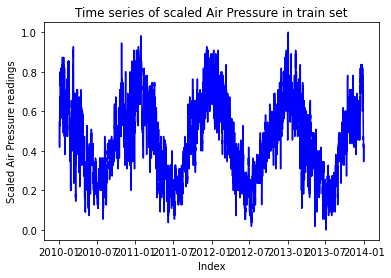

In [26]:
"""
The train and test time series of standardized PRES are also plotted.
"""

g = sns.lineplot(x='datetime',y='scaled_PRES',data=df_train, color='b')
g.set_title('Time series of scaled Air Pressure in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')


Text(0, 0.5, 'Scaled Air Pressure readings')

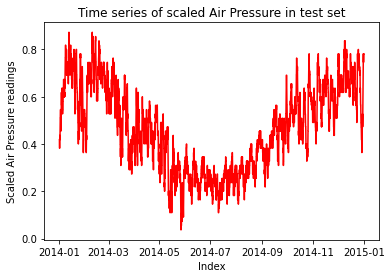

In [27]:
g = sns.lineplot(x='datetime',y='scaled_PRES',data=df_test, color='r')
g.set_title('Time series of scaled Air Pressure in test set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')

In [30]:
# Make dataset to forecast using past 7 days

def makeXy(ts, nb_timesteps):
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]): 
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])                    
    X, y = np.array(X), np.array(y)
    return X, y

In [31]:
df_train.iloc[:10]

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  \
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0   
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0   
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0   
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0   
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0   
5   6  2010      1    1     5    NaN   -19 -10.0  1017.0   NW  16.10   0   0   
6   7  2010      1    1     6    NaN   -19  -9.0  1017.0   NW  19.23   0   0   
7   8  2010      1    1     7    NaN   -19  -9.0  1017.0   NW  21.02   0   0   
8   9  2010      1    1     8    NaN   -19  -9.0  1017.0   NW  24.15   0   0   
9  10  2010      1    1     9    NaN   -20  -8.0  1017.0   NW  27.28   0   0   

             datetime  scaled_PRES  
0 2010-01-01 00:00:00     0.545455  
1 2010-01-01 01:00:00     0.527273  
2 2010-01-01 02:00:00     0.509091  
3 2010-01-01 03:00:00     0.509091  
4 2010-01-01 04:00:00     0.490909  
5 2010-01-01 05:00:00     0.472727  
6 2010-01-01 06:00:00     0.472727  
7 2010-01-01 07:00:00     0.472727  
8 2010-01-01 08:00:00     0.472727  
9 2010-01-01 09:00:00     0.472727

In [29]:
df_train.loc[:10]

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  \
0    1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0   
1    2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0   
2    3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0   
3    4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0   
4    5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0   
5    6  2010      1    1     5    NaN   -19 -10.0  1017.0   NW  16.10   0   0   
6    7  2010      1    1     6    NaN   -19  -9.0  1017.0   NW  19.23   0   0   
7    8  2010      1    1     7    NaN   -19  -9.0  1017.0   NW  21.02   0   0   
8    9  2010      1    1     8    NaN   -19  -9.0  1017.0   NW  24.15   0   0   
9   10  2010      1    1     9    NaN   -20  -8.0  1017.0   NW  27.28   0   0   
10  11  2010      1    1    10    NaN   -19  -7.0  1017.0   NW  31.30   0   0   

              datetime  scaled_PRES  
0  2010-01-01 00:00:00     0.545455  
1  2010-01-01 01:00:00     0.527273  
2  2010-01-01 02:00:00     0.509091  
3  2010-01-01 03:00:00     0.509091  
4  2010-01-01 04:00:00     0.490909  
5  2010-01-01 05:00:00     0.472727  
6  2010-01-01 06:00:00     0.472727  
7  2010-01-01 07:00:00     0.472727  
8  2010-01-01 08:00:00     0.472727  
9  2010-01-01 09:00:00     0.472727  
10 2010-01-01 10:00:00     0.472727

In [32]:
# Make training set
X_train, y_train = makeXy(df_train['scaled_PRES'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)
print(X_train[0])
print(y_train[0])
print(df.shape)

Shape of train arrays: (35057, 7) (35057,)
[0.54545455 0.52727273 0.50909091 0.50909091 0.49090909 0.47272727
 0.47272727]
0.47272727272727266
(43824, 15)


In [33]:
df_train.shape

(35064, 15)

In [47]:
X_train[0]

array([0.54545455, 0.52727273, 0.50909091, 0.50909091, 0.49090909,
       0.47272727, 0.47272727])

In [48]:
y_train[0]

0.47272727272727266

In [34]:
df_train['scaled_PRES'].loc[0:6]

0    0.545455
1    0.527273
2    0.509091
3    0.509091
4    0.490909
5    0.472727
6    0.472727
Name: scaled_PRES, dtype: float64

In [35]:
# Make test set
X_test, y_test = makeXy(df_test['scaled_PRES'], 7)
print('Shape of Test arrays:', X_test.shape, y_test.shape)
print(X_test[0])
print(y_test[0])

Shape of Test arrays: (8753, 7) (8753,)
[0.41818182 0.4        0.4        0.4        0.38181818 0.38181818
 0.38181818]
0.40000000000000213


In [36]:
#Import Keras modules
from keras.layers import Dense, Dropout
from keras.models import Sequential


In [37]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(7,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

In [38]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


In [39]:
history=model.fit(X_train, y_train, batch_size=16, epochs=20,
             verbose=1, validation_split=0.3,
             shuffle=True)

Epoch 1/20
1534/1534 [==============================] - 2s 859us/step - loss: 0.0148 - val_loss: 8.6157e-04
Epoch 2/20
1534/1534 [==============================] - 1s 774us/step - loss: 0.0029 - val_loss: 3.2948e-04
Epoch 3/20
1534/1534 [==============================] - 1s 722us/step - loss: 0.0024 - val_loss: 2.6857e-04
Epoch 4/20
1534/1534 [==============================] - 1s 723us/step - loss: 0.0023 - val_loss: 2.7780e-04
Epoch 5/20
1534/1534 [==============================] - 1s 759us/step - loss: 0.0024 - val_loss: 3.5365e-04
Epoch 6/20
1534/1534 [==============================] - 1s 739us/step - loss: 0.0024 - val_loss: 3.1483e-04
Epoch 7/20
1534/1534 [==============================] - 1s 733us/step - loss: 0.0024 - val_loss: 2.8017e-04
Epoch 8/20
1534/1534 [==============================] - 1s 777us/step - loss: 0.0024 - val_loss: 3.3884e-04
Epoch 9/20
1534/1534 [==============================] - 1s 730us/step - loss: 0.0023 - val_loss: 2.7500e-04
Epoch 10/20
1534/1534 [=====

In [40]:
preds = model.predict(X_test)
pred_PRES = scaler.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)
pred_PRES

array([1011.89465, 1012.9156 , 1013.33124, ..., 1033.2153 , 1033.1792 ,
       1033.0604 ], dtype=float32)

In [41]:
# R2 Calculation
from sklearn.metrics import r2_score
r2 = r2_score(df_test['PRES'].loc[7:], pred_PRES)
print('R-squared for the test set:', round(r2,4))

R-squared for the test set: 0.9925


Text(0.5, 0, 'Index')

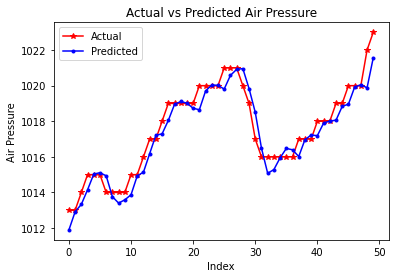

In [42]:
#Let's plot the first 50 actual and predicted values of air pressure.
plt.plot(range(50), df_test['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')